# Evaluate the classifier

In file 7_ I created the classifiers for the initial experiment setup. 
Now I need to evaluate them 

In [2]:
import numpy as np
import sklearn 
from sklearn.neighbors import KDTree
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn import metrics
import pandas as pd
from sklearn.externals import joblib

In [3]:
NN = 10

In [4]:
# Uploadng my datasets
# Define a data frame with all my data# Define  
FILE_PATH = r"../DATA/ML_datasets/Initial_setup"
META_FILE_PATH = "../DATA/META"
IMAGE_FILE_PATH = r"images"

# Training data
y_train = np.loadtxt(FILE_PATH+'/y_train_'+ str(NN) +'NN_3842samples.txt', delimiter=',')
X_train = np.loadtxt(FILE_PATH+'/X_train_'+ str(NN) +'NN_3842samples.txt', delimiter=',')

# Testing data
y_test = np.loadtxt(FILE_PATH+'/y_test_'+ str(NN) +'NN.txt', delimiter=',')
X_test = np.loadtxt(FILE_PATH+'/X_test_'+ str(NN) +'NN.txt', delimiter=',')

In [5]:
# For RF classifier: cast as float32 
y_train = y_train.astype('float32')
X_train = X_train.astype('float32')
y_test = y_test.astype('float32')
X_test = X_test.astype('float32')

In [6]:
###uploading the saved classifier
filename = '/randomforest_model_'+ str(NN) +'NN_downsample.sav'
clf = joblib.load(FILE_PATH + filename)

## Make predictions

Now predict values for the whole training set (on data the model has seen before)

In [7]:
predictions_train = clf.predict(X_train)
predictions_test = clf.predict(X_test)

np.savetxt(FILE_PATH+'/predictions_train_'+ str(NN) +'NN_downsample.txt', predictions_train, delimiter=',')
np.savetxt(FILE_PATH+'/predictions_test_'+ str(NN) +'NN_downsample.txt', predictions_test, delimiter=',')

print "This is the number of NN:", NN

This is the number of NN: 10


## Now evaluate the model

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

scalerX, scalerY = MinMaxScaler(), MinMaxScaler()

scaled_X = scalerX.fit_transform(X_train)

clf_dave = RandomForestClassifier(max_depth=12, random_state=42, n_estimators=1000, criterion='gini')
clf_dave.fit(X_train, y_train)

score_train = clf_dave.score(X_train, y_train)
#score_train = clf.score(X_train, y_train)
print "Score on training dataset:", score_train

Score on training dataset: 0.885090909090909


In [ ]:
results = []
for md in range(4, 22, 2):
    for ne in range(100, 1100, 100):
        clf_dave = RandomForestClassifier(max_depth=12, random_state=42, n_estimators=1000, criterion='gini')
        clf_dave.fit(X_train, y_train)
        score_train = clf_dave.score(X_train, y_train)
        results.append([md, ne, score_train])

In [ ]:
results = []
for md in range(4, 22, 2):
    for ne in range(100, 1100, 100):
        clf_dave = RandomForestClassifier(max_depth=12, random_state=42, n_estimators=1000, criterion='gini')
        clf_dave.fit(X_train, y_train)
        score_train = clf_dave.score(X_test, y_test) 
        results.append([md, ne, score_train])

In [9]:
score_test = clf.score(X_test, y_test)
print "Score on testing dataset:", score_test

Score on testing dataset: 0.584492180130914


In [10]:
clf.feature_importances_

array([0.01219544, 0.01839741, 0.01509639, 0.04414173, 0.0188225 ,
       0.1037373 , 0.10702569, 0.02288916, 0.1722243 , 0.31166235,
       0.17380774])

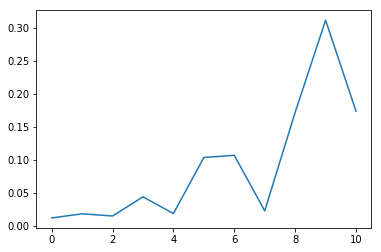

In [18]:
x_=[0.01219544, 0.01839741, 0.01509639, 0.04414173, 0.0188225 ,0.1037373 , 0.10702569, 0.02288916, 0.1722243 , 0.31166235,0.17380774]
import pylab as plt
%matplotlib inline
plt.figure()
plt.plot(x_)
plt.show()